In [2]:
from extra_data import RunDirectory 
import h5py 
import numpy as np 
%matplotlib widget
import matplotlib.pyplot as plt 

In [3]:
def extract_gifs(r, verbose=True):
    run = RunDirectory(path=f'/gpfs/exfel/exp/SPB/202202/p003046/raw/r%04d' % (r))  
    
    # The require_all=True ensures we only get trains which exist for all sources
    sel = run.select([
        ('SPB_XTD9_XGM/XGM/DOOCS:output', 'data.intensitySa1TD'),
        ('SPB_IRU_MOTORS/MDL/DATA_SELECT', '*'),
        ('SPB_EXP_ZYLA/CAM/1:daqOutput', 'data.image.pixels'),
        ('LA1_LAS_PPL/CTRL/TRGDLY', 'triggerFE_UPSTREAM.value'), 
    ], require_all=True)
    if(verbose):
        sel.info()   
    sidemic_extra = sel['SPB_EXP_ZYLA/CAM/1:daqOutput', 'data.image.pixels']
    trains = sidemic_extra.train_id_coordinates()
    sidemic = sidemic_extra.xarray()
    extra = sel['LA1_LAS_PPL/CTRL/TRGDLY', 'triggerFE_UPSTREAM.value']
    delay = extra.xarray()
    return sidemic, delay

# of trains:    3125
Duration:       0:05:12.6
First train ID: 1475318358
Last train ID:  1475321483

0 detector modules ()

2 instrument sources (excluding detectors):
  - SPB_EXP_ZYLA/CAM/1:daqOutput
  - SPB_XTD9_XGM/XGM/DOOCS:output

2 control sources:
  - LA1_LAS_PPL/CTRL/TRGDLY
  - SPB_IRU_MOTORS/MDL/DATA_SELECT



In [9]:
sidemic, delay = extract_gifs(188)
xray_delay = delay[0]

In [5]:
# define the time delays we wish to look at 
dt = [0, 1, 2, 7.2, 31, 95]
# and the tolerance around those time delays
tol_dt = [0.05, 0.05, 0.05, 0.08, 1, 1]

In [11]:
runs = [188, 190, 192]

# of trains:    3125
Duration:       0:05:12.6
First train ID: 1475318358
Last train ID:  1475321483

0 detector modules ()

2 instrument sources (excluding detectors):
  - SPB_EXP_ZYLA/CAM/1:daqOutput
  - SPB_XTD9_XGM/XGM/DOOCS:output

2 control sources:
  - LA1_LAS_PPL/CTRL/TRGDLY
  - SPB_IRU_MOTORS/MDL/DATA_SELECT

Time Delay = 0.0 us
Time Delay = 1.0 us
Time Delay = 2.0 us
# of trains:    3126
Duration:       0:05:12.6
First train ID: 1475324867
Last train ID:  1475327992

0 detector modules ()

2 instrument sources (excluding detectors):
  - SPB_EXP_ZYLA/CAM/1:daqOutput
  - SPB_XTD9_XGM/XGM/DOOCS:output

2 control sources:
  - LA1_LAS_PPL/CTRL/TRGDLY
  - SPB_IRU_MOTORS/MDL/DATA_SELECT

Time Delay = 7.2 us
# of trains:    1493
Duration:       0:02:29.5
First train ID: 1475329993
Last train ID:  1475331487

0 detector modules ()

2 instrument sources (excluding detectors):
  - SPB_EXP_ZYLA/CAM/1:daqOutput
  - SPB_XTD9_XGM/XGM/DOOCS:output

2 control sources:
  - LA1_LAS_PPL/CTRL/TRG

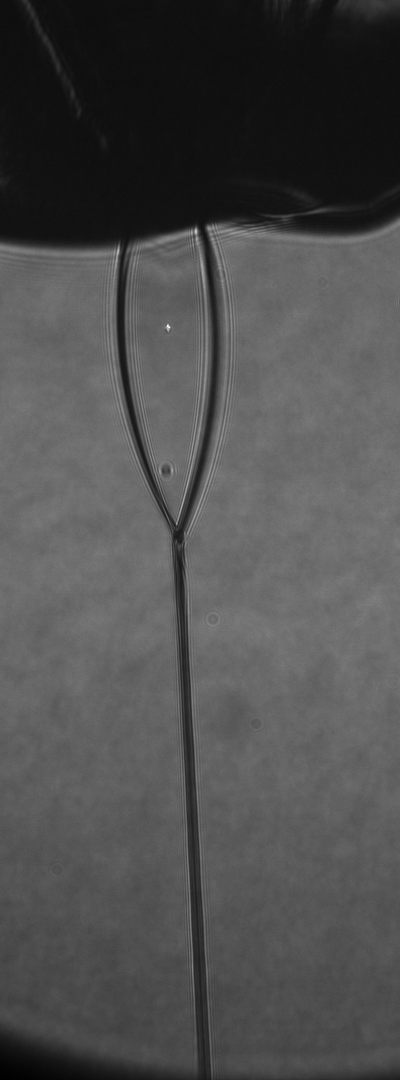

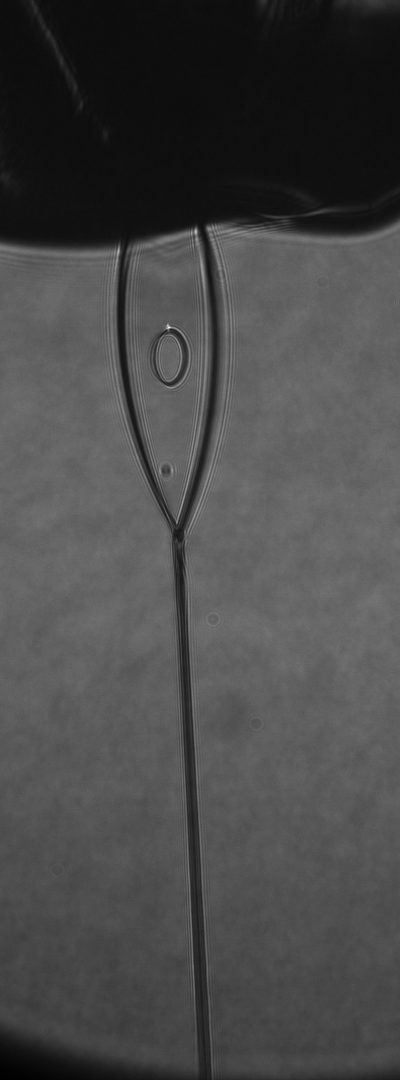

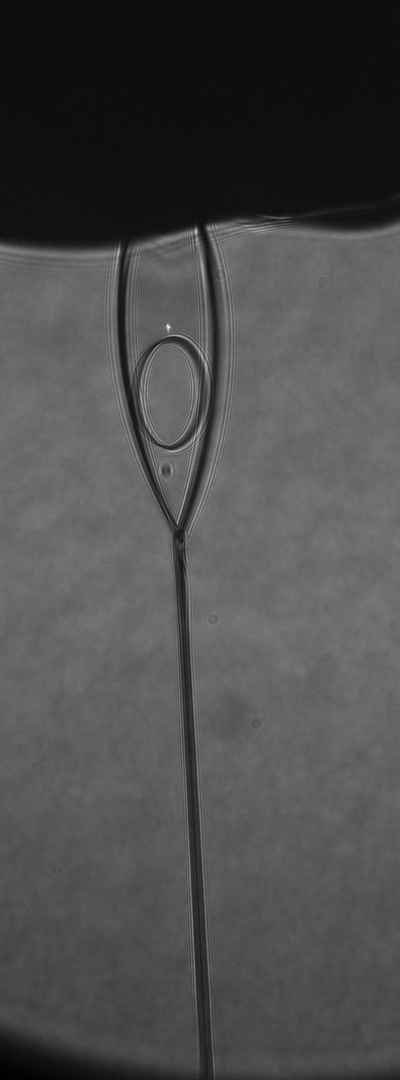

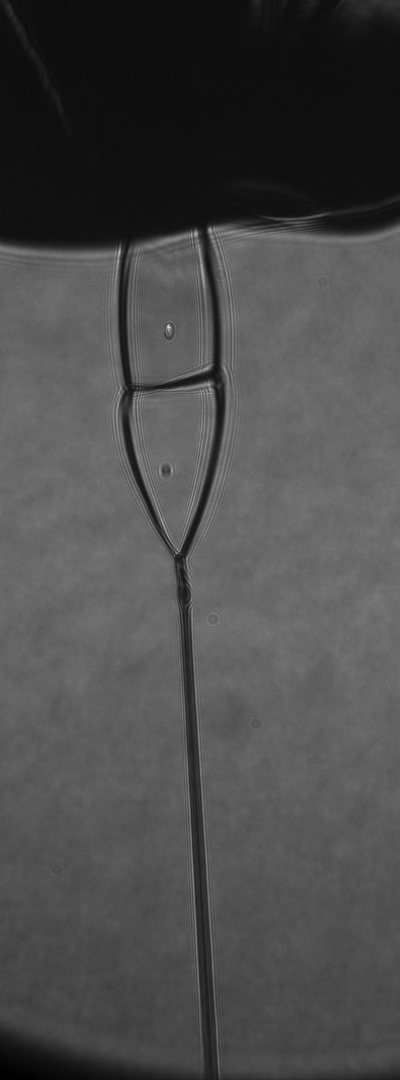

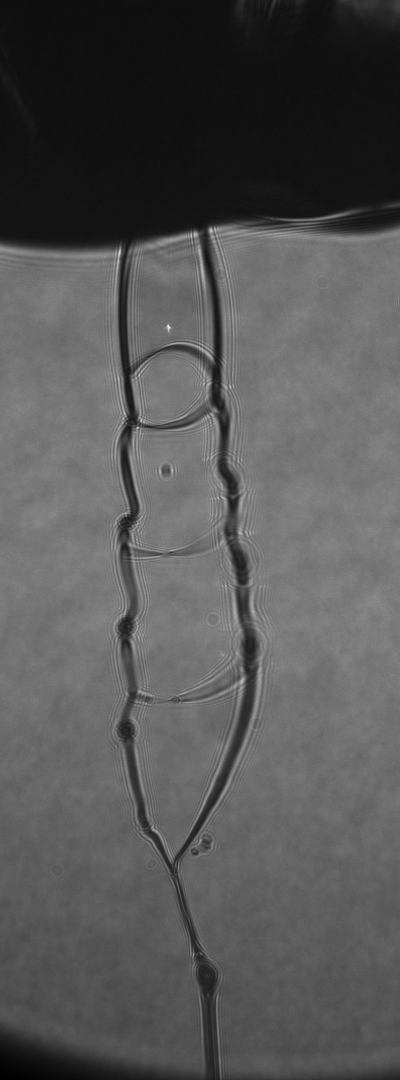

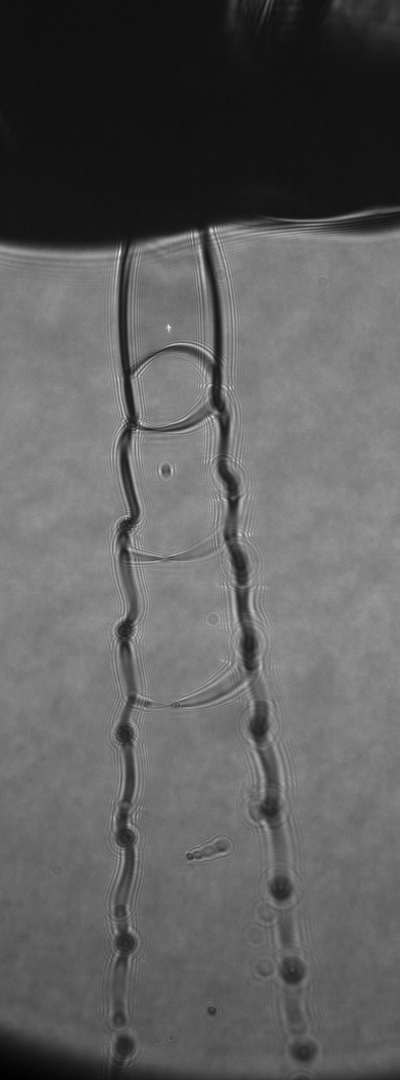

In [16]:
cmap = 'gray'
for r in runs:
    sidemic, delay = extract_gifs(r)    
    for t, tol_t in zip(dt, tol_dt):
        idx = np.where(np.abs((delay-xray_delay) - t) <  tol_t)[0]
        if(len(idx) == 0):
            continue
        # for some reason the first frames around 7.2 us 
        # delay are black so we'll skip a bit
        if(t != 7.2):
            idx = np.min(idx).astype(int)
        else:
            idx = np.min(idx).astype(int)+160
        
        fig = plt.figure(figsize=(1,2.7),dpi=400, frameon=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        img = plt.imshow(sidemic[idx,200:1280,200:600])
        img.set_cmap(cmap)
        print('Time Delay = %.1f us' % ((delay[idx]-xray_delay)))
        plt.savefig('../figures/3_LJ_Fig3_delta_T_%.1fus_%s.png' % ((delay[idx]-xray_delay), cmap))

In [120]:
plt.figure()
plt.plot(delay-xray_delay)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …